<a href="https://colab.research.google.com/github/pratapponnam/ProstateDetection/blob/main/data_preprocess_week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# prompt: connect to google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import json
import os
from pathlib import Path

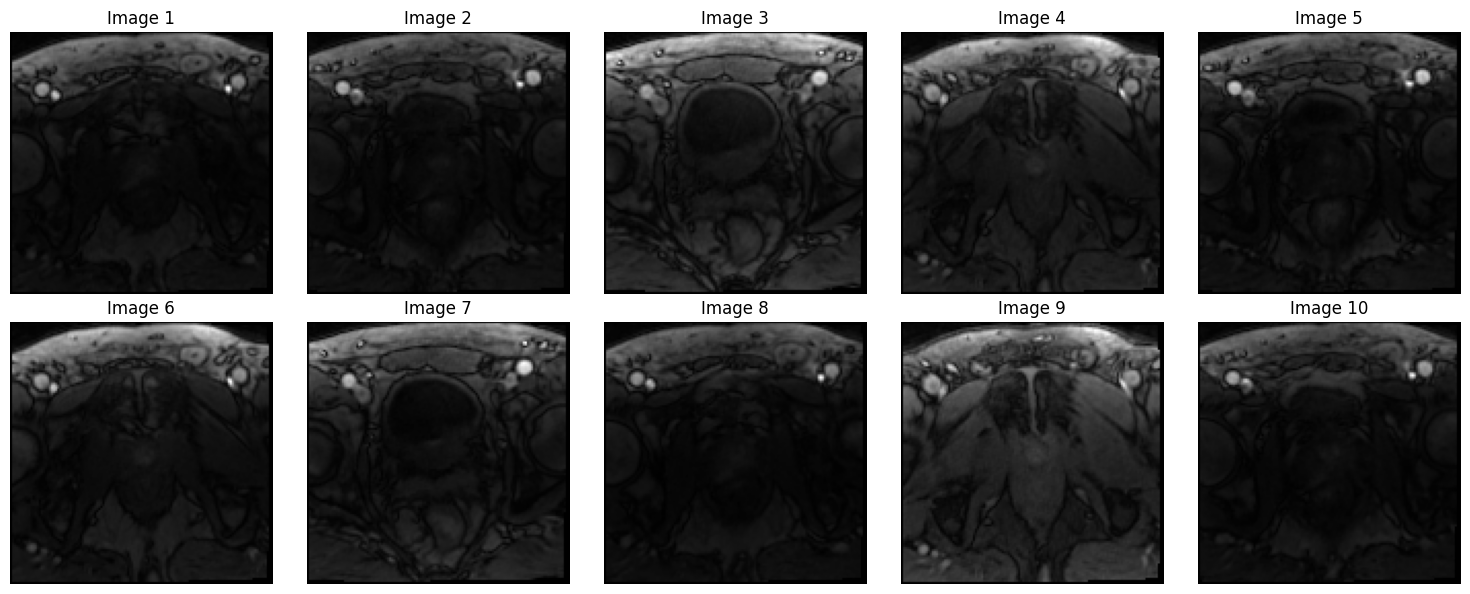

In [4]:
import pydicom
import matplotlib.pyplot as plt
import os

# Directory containing the extracted DICOM files
dicom_dir = "/content/drive/MyDrive/ProstateX-0000/"

# List to store DICOM file paths
dicom_files = []
for root, dirs, files in os.walk(dicom_dir):
    for file in files:
        if file.lower().endswith(".dcm"):
            dicom_files.append(os.path.join(root, file))

# Function to display multiple DICOM images
def display_dicom_images(dicom_files, num_images=10, columns=5):
    num_images = min(num_images, len(dicom_files))
    rows = (num_images + columns - 1) // columns
    fig, axes = plt.subplots(rows, columns, figsize=(15, rows * 3))
    axes = axes.flatten()

    for i in range(num_images):
        dicom = pydicom.dcmread(dicom_files[i])
        img = dicom.pixel_array  # Extract the pixel array

        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"Image {i+1}")
        axes[i].axis('off')

    # Hide unused subplots
    for i in range(num_images, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Display the first 10 DICOM images
display_dicom_images(dicom_files, num_images=10)


In [ ]:
clinsig_data = {
    "ProstateX-0000": 0}

# Merge the clinsig_data into df_images
df_images = df_images.merge(pd.DataFrame(clinsig_data.items(), columns=["PatientID", "ClinSig"]), on="PatientID", how="left")

In [ ]:
import pydicom
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Function to load DICOM image and resize it to (128x128) for the CNN
def load_dicom_image(file_path, img_size=128):
    dicom = pydicom.dcmread(file_path)
    img = dicom.pixel_array.astype(np.float32)
    img = cv2.resize(img, (img_size, img_size))  # Resize to fixed dimensions
    img = (img - np.min(img)) / (np.max(img) - np.min(img))  # Normalize to 0-1
    return img

# Prepare image dataset
images = []
labels = []  # Assuming you have labels in df_images['ClinSig'] (0 or 1 for clinical significance)

for _, row in df_images.iterrows():
    img = load_dicom_image(row["FilePath"])
    images.append(img)
    labels.append(row["ClinSig"])  # Adjust column name for the label

# Convert to numpy arrays
X = np.array(images).reshape(-1, 128, 128, 1)  # Add channel dimension
y = to_categorical(labels, num_classes=2)  # Convert labels to categorical (binary classification)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=16)


Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 61s 585ms/step - accuracy: 0.9040 - loss: 0.0798 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 34s 433ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 22s 477ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 41s 469ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 442ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [1]:
!pip install picai_prep

In [2]:
!pip install SimpleITK

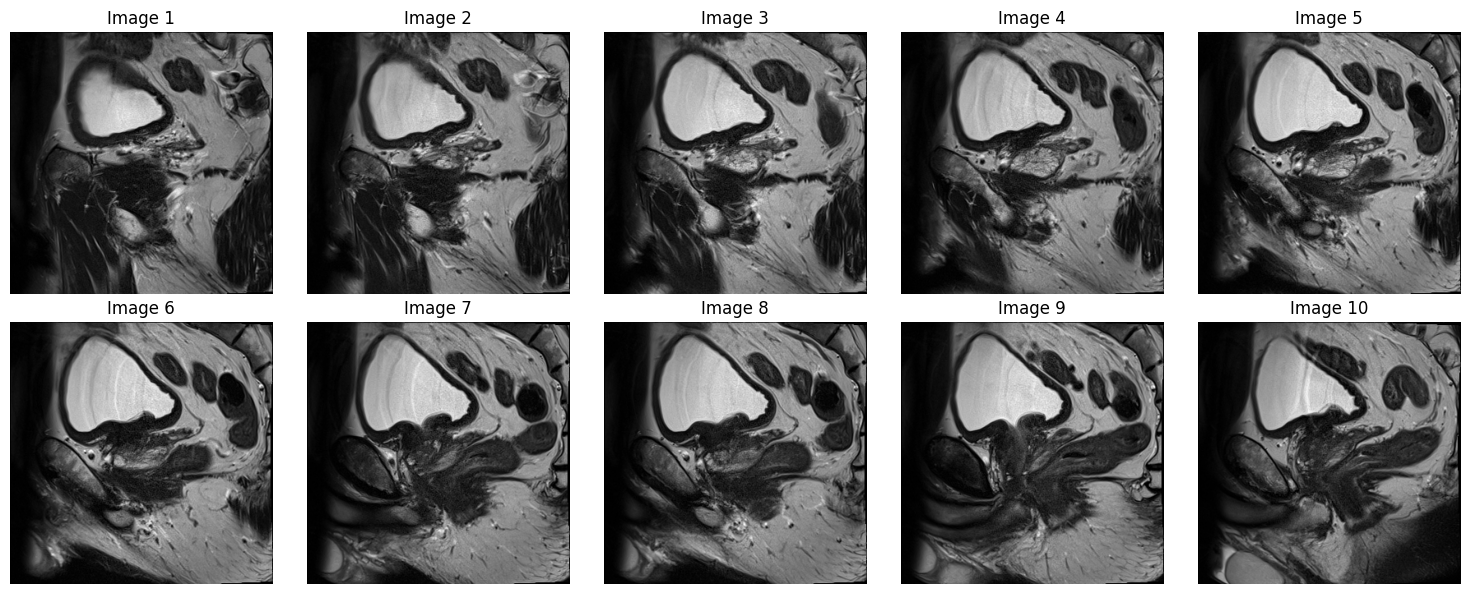

In [ ]:
import os
import pydicom
import matplotlib.pyplot as plt

# Path to your DICOM images
base_path = "/content/drive/MyDrive/ProstateX-0000"

# List to hold file paths of .dcm images
dicom_files = []

# Walk through the directory and collect all DICOM files
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.lower().endswith(".dcm"):
            dicom_files.append(os.path.join(root, file))

# Function to display multiple DICOM images
def display_dicom_images(dicom_files, num_images=10, columns=5):
    num_images = min(num_images, len(dicom_files))
    rows = (num_images + columns - 1) // columns
    fig, axes = plt.subplots(rows, columns, figsize=(15, rows * 3))
    axes = axes.flatten()

    for i in range(num_images):
        dicom = pydicom.dcmread(dicom_files[i])
        img = dicom.pixel_array  # Get the pixel array

        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"Image {i+1}")
        axes[i].axis('off')

    # Hide unused subplots
    for i in range(num_images, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Display the first 10 DICOM images
display_dicom_images(dicom_files, num_images=10)
